In [1]:
import tensorflow as tf
import os
import numpy as np
import random
from Script.DataGenerator import DataGenerator
from Script.Metrics_Evaluation import Evaluation
from BiLSTM import BiLSTM, generate_input
import matplotlib.pyplot as plt
import pandas as pd
import shutil
from tqdm import tqdm

In [2]:
BATCH_SIZE = 8192
DATA_PATH = "Train2"
VALIDATION_PATH = "Validation2"
TEST_PATH = "Test2"
MODEL_PATH = os.path.join("Model", "BiLSTM")

In [15]:
datagen_train = DataGenerator(DATA_PATH, generate_input, batch_size=BATCH_SIZE, split=0.99, extension="_.ssm.npy")
datagen_validation = DataGenerator(VALIDATION_PATH, generate_input, batch_size=BATCH_SIZE, split=0.90, extension="_.ssm.npy")

## Model Bi-lstm

In [4]:
model = BiLSTM().build()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16, 6)]           0         
                                                                 
 bidirectional (Bidirectiona  (None, 32)               2944      
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 2,977
Trainable params: 2,977
Non-trainable params: 0
_________________________________________________________________


## Training 

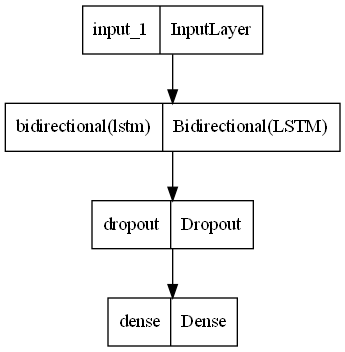

In [5]:
tf.keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)

In [6]:
metrics = ["accuracy", tf.keras.metrics.Precision(thresholds=0.5), tf.keras.metrics.Recall(thresholds=0.5)]

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.binary_crossentropy, metrics=metrics)

In [8]:
hist = model.fit(datagen_train, validation_data=datagen_validation, epochs=40,
         callbacks= tf.keras.callbacks.ReduceLROnPlateau(factor=tf.math.exp(-4.1), patience=5, min_lr=0.0000001))

Epoch 1/40
464/464 [==============================] - 83s 171ms/step - loss: 0.3175 - accuracy: 0.8848 - precision: 0.3782 - recall: 0.0594 - val_loss: 0.1771 - val_accuracy: 0.9361 - val_precision: 0.7143 - val_recall: 4.1532e-04 - lr: 0.0010
Epoch 2/40
464/464 [==============================] - 81s 175ms/step - loss: 0.2692 - accuracy: 0.8921 - precision: 0.5928 - recall: 0.1470 - val_loss: 0.1652 - val_accuracy: 0.9551 - val_precision: 0.8064 - val_recall: 0.6430 - lr: 0.0010
Epoch 3/40
464/464 [==============================] - 83s 178ms/step - loss: 0.2120 - accuracy: 0.9199 - precision: 0.7161 - recall: 0.4186 - val_loss: 0.0969 - val_accuracy: 0.9712 - val_precision: 0.9179 - val_recall: 0.5208 - lr: 0.0010
Epoch 4/40
464/464 [==============================] - 83s 180ms/step - loss: 0.1877 - accuracy: 0.9329 - precision: 0.8104 - recall: 0.5171 - val_loss: 0.0857 - val_accuracy: 0.9716 - val_precision: 0.8711 - val_recall: 0.6572 - lr: 0.0010
Epoch 5/40
464/464 [================

Epoch 35/40
464/464 [==============================] - 80s 172ms/step - loss: 0.1006 - accuracy: 0.9607 - precision: 0.9284 - recall: 0.7061 - val_loss: 0.0353 - val_accuracy: 0.9843 - val_precision: 0.9872 - val_recall: 0.8444 - lr: 1.0000e-07
Epoch 36/40
464/464 [==============================] - 80s 172ms/step - loss: 0.0936 - accuracy: 0.9640 - precision: 0.9267 - recall: 0.7183 - val_loss: 0.0392 - val_accuracy: 0.9826 - val_precision: 0.9681 - val_recall: 0.8417 - lr: 1.0000e-07
Epoch 37/40
464/464 [==============================] - 80s 173ms/step - loss: 0.0996 - accuracy: 0.9610 - precision: 0.9250 - recall: 0.7007 - val_loss: 0.0305 - val_accuracy: 0.9889 - val_precision: 0.9469 - val_recall: 0.8688 - lr: 1.0000e-07
Epoch 38/40
464/464 [==============================] - 80s 173ms/step - loss: 0.0946 - accuracy: 0.9629 - precision: 0.9298 - recall: 0.7053 - val_loss: 0.0504 - val_accuracy: 0.9813 - val_precision: 0.9554 - val_recall: 0.8305 - lr: 1.0000e-07
Epoch 39/40
464/464 

Index(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy',
       'val_precision', 'val_recall', 'lr'],
      dtype='object')


<Figure size 1000x500 with 0 Axes>

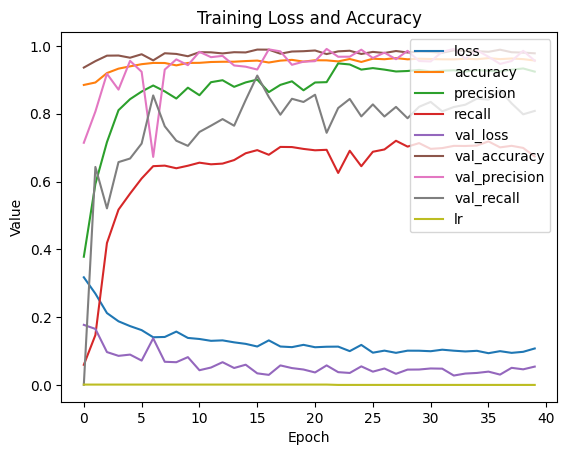

In [13]:
history_df = pd.DataFrame(hist.history)
# Plot the training loss and accuracy
plt.figure(figsize=(10, 5))
history_df[['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'lr']].plot()
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend(loc='upper right')
plt.show()

# Evaluate

In [16]:
datagen_test = DataGenerator(TEST_PATH, generate_input, batch_size=BATCH_SIZE, split=0.99, extension="_.ssm.npy")

In [17]:
e1 = Evaluation(model, datagen_test)
e1.predict()
e1.eval_()

  0%|          | 0/174 [00:00<?, ?it/s]

256/256 [==============================] - 1s 2ms/step


  1%|          | 1/174 [00:00<01:45,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


  1%|          | 2/174 [00:01<01:44,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


  2%|▏         | 3/174 [00:01<01:46,  1.60it/s]

256/256 [==============================] - 1s 2ms/step


  2%|▏         | 4/174 [00:02<01:45,  1.60it/s]

256/256 [==============================] - 1s 2ms/step


  3%|▎         | 5/174 [00:03<01:44,  1.61it/s]

256/256 [==============================] - 1s 2ms/step


  3%|▎         | 6/174 [00:03<01:44,  1.61it/s]

256/256 [==============================] - 1s 2ms/step


  4%|▍         | 7/174 [00:04<01:44,  1.60it/s]

256/256 [==============================] - 0s 2ms/step


  5%|▍         | 8/174 [00:04<01:42,  1.63it/s]

256/256 [==============================] - 0s 2ms/step


  5%|▌         | 9/174 [00:05<01:39,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


  6%|▌         | 10/174 [00:06<01:42,  1.59it/s]

256/256 [==============================] - 1s 2ms/step


  6%|▋         | 11/174 [00:06<01:42,  1.58it/s]

256/256 [==============================] - 1s 2ms/step


  7%|▋         | 12/174 [00:07<01:44,  1.54it/s]

256/256 [==============================] - 1s 2ms/step


  7%|▋         | 13/174 [00:08<01:45,  1.53it/s]

256/256 [==============================] - 1s 2ms/step


  8%|▊         | 14/174 [00:08<01:45,  1.51it/s]

256/256 [==============================] - 1s 2ms/step


  9%|▊         | 15/174 [00:09<01:42,  1.54it/s]

256/256 [==============================] - 0s 2ms/step


  9%|▉         | 16/174 [00:10<01:39,  1.58it/s]

256/256 [==============================] - 1s 2ms/step


 10%|▉         | 17/174 [00:10<01:39,  1.58it/s]

256/256 [==============================] - 0s 2ms/step


 10%|█         | 18/174 [00:11<01:36,  1.62it/s]

256/256 [==============================] - 0s 2ms/step


 11%|█         | 19/174 [00:11<01:34,  1.64it/s]

256/256 [==============================] - 0s 2ms/step


 11%|█▏        | 20/174 [00:12<01:32,  1.66it/s]

256/256 [==============================] - 0s 2ms/step


 12%|█▏        | 21/174 [00:13<01:30,  1.68it/s]

256/256 [==============================] - 0s 2ms/step


 13%|█▎        | 22/174 [00:13<01:30,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 13%|█▎        | 23/174 [00:14<01:30,  1.66it/s]

256/256 [==============================] - 0s 2ms/step


 14%|█▍        | 24/174 [00:14<01:30,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 14%|█▍        | 25/174 [00:15<01:30,  1.65it/s]

256/256 [==============================] - 0s 2ms/step


 15%|█▍        | 26/174 [00:16<01:28,  1.66it/s]

256/256 [==============================] - 0s 2ms/step


 16%|█▌        | 27/174 [00:16<01:27,  1.68it/s]

256/256 [==============================] - 0s 2ms/step


 16%|█▌        | 28/174 [00:17<01:25,  1.70it/s]

256/256 [==============================] - 0s 2ms/step


 17%|█▋        | 29/174 [00:17<01:25,  1.70it/s]

256/256 [==============================] - 0s 2ms/step


 17%|█▋        | 30/174 [00:18<01:25,  1.68it/s]

256/256 [==============================] - 0s 2ms/step


 18%|█▊        | 31/174 [00:19<01:24,  1.69it/s]

256/256 [==============================] - 0s 2ms/step


 18%|█▊        | 32/174 [00:19<01:23,  1.70it/s]

256/256 [==============================] - 0s 2ms/step


 19%|█▉        | 33/174 [00:20<01:22,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 20%|█▉        | 34/174 [00:20<01:24,  1.66it/s]

256/256 [==============================] - 0s 2ms/step


 20%|██        | 35/174 [00:21<01:23,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 21%|██        | 36/174 [00:22<01:27,  1.59it/s]

256/256 [==============================] - 1s 2ms/step


 21%|██▏       | 37/174 [00:22<01:29,  1.53it/s]

256/256 [==============================] - 1s 2ms/step


 22%|██▏       | 38/174 [00:23<01:30,  1.50it/s]

256/256 [==============================] - 1s 2ms/step


 22%|██▏       | 39/174 [00:24<01:29,  1.51it/s]

256/256 [==============================] - 1s 2ms/step


 23%|██▎       | 40/174 [00:24<01:29,  1.50it/s]

256/256 [==============================] - 1s 2ms/step


 24%|██▎       | 41/174 [00:25<01:27,  1.52it/s]

256/256 [==============================] - 1s 2ms/step


 24%|██▍       | 42/174 [00:26<01:25,  1.54it/s]

256/256 [==============================] - 1s 2ms/step


 25%|██▍       | 43/174 [00:26<01:25,  1.52it/s]

256/256 [==============================] - 1s 2ms/step


 25%|██▌       | 44/174 [00:27<01:25,  1.53it/s]

256/256 [==============================] - 0s 2ms/step


 26%|██▌       | 45/174 [00:28<01:22,  1.57it/s]

256/256 [==============================] - 0s 2ms/step


 26%|██▋       | 46/174 [00:28<01:18,  1.62it/s]

256/256 [==============================] - 0s 2ms/step


 27%|██▋       | 47/174 [00:29<01:17,  1.64it/s]

256/256 [==============================] - 0s 2ms/step


 28%|██▊       | 48/174 [00:29<01:16,  1.64it/s]

256/256 [==============================] - 0s 2ms/step


 28%|██▊       | 49/174 [00:30<01:14,  1.67it/s]

256/256 [==============================] - 0s 2ms/step


 29%|██▊       | 50/174 [00:30<01:13,  1.68it/s]

256/256 [==============================] - 0s 2ms/step


 29%|██▉       | 51/174 [00:31<01:12,  1.69it/s]

256/256 [==============================] - 0s 2ms/step


 30%|██▉       | 52/174 [00:32<01:12,  1.69it/s]

256/256 [==============================] - 0s 2ms/step


 30%|███       | 53/174 [00:32<01:11,  1.69it/s]

256/256 [==============================] - 0s 2ms/step


 31%|███       | 54/174 [00:33<01:10,  1.70it/s]

256/256 [==============================] - 0s 2ms/step


 32%|███▏      | 55/174 [00:33<01:09,  1.71it/s]

256/256 [==============================] - 0s 2ms/step


 32%|███▏      | 56/174 [00:34<01:09,  1.70it/s]

256/256 [==============================] - 0s 2ms/step


 33%|███▎      | 57/174 [00:35<01:08,  1.71it/s]

256/256 [==============================] - 0s 2ms/step


 33%|███▎      | 58/174 [00:35<01:08,  1.70it/s]

256/256 [==============================] - 0s 2ms/step


 34%|███▍      | 59/174 [00:36<01:07,  1.70it/s]

256/256 [==============================] - 0s 2ms/step


 34%|███▍      | 60/174 [00:36<01:06,  1.71it/s]

256/256 [==============================] - 0s 2ms/step


 35%|███▌      | 61/174 [00:37<01:05,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 36%|███▌      | 62/174 [00:38<01:07,  1.66it/s]

256/256 [==============================] - 1s 2ms/step


 36%|███▌      | 63/174 [00:38<01:09,  1.61it/s]

256/256 [==============================] - 1s 2ms/step


 37%|███▋      | 64/174 [00:39<01:09,  1.57it/s]

256/256 [==============================] - 1s 2ms/step


 37%|███▋      | 65/174 [00:40<01:09,  1.56it/s]

256/256 [==============================] - 1s 2ms/step


 38%|███▊      | 66/174 [00:40<01:10,  1.54it/s]

256/256 [==============================] - 1s 2ms/step


 39%|███▊      | 67/174 [00:41<01:09,  1.54it/s]

256/256 [==============================] - 0s 2ms/step


 39%|███▉      | 68/174 [00:41<01:06,  1.58it/s]

256/256 [==============================] - 1s 2ms/step


 40%|███▉      | 69/174 [00:42<01:06,  1.58it/s]

256/256 [==============================] - 1s 2ms/step


 40%|████      | 70/174 [00:43<01:05,  1.59it/s]

256/256 [==============================] - 0s 2ms/step


 41%|████      | 71/174 [00:43<01:03,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 41%|████▏     | 72/174 [00:44<01:03,  1.62it/s]

256/256 [==============================] - 0s 2ms/step


 42%|████▏     | 73/174 [00:44<01:01,  1.65it/s]

256/256 [==============================] - 0s 2ms/step


 43%|████▎     | 74/174 [00:45<01:00,  1.67it/s]

256/256 [==============================] - 0s 2ms/step


 43%|████▎     | 75/174 [00:46<00:59,  1.67it/s]

256/256 [==============================] - 0s 2ms/step


 44%|████▎     | 76/174 [00:46<00:57,  1.69it/s]

256/256 [==============================] - 0s 2ms/step


 44%|████▍     | 77/174 [00:47<00:57,  1.69it/s]

256/256 [==============================] - 0s 2ms/step


 45%|████▍     | 78/174 [00:47<00:56,  1.69it/s]

256/256 [==============================] - 0s 2ms/step


 45%|████▌     | 79/174 [00:48<00:55,  1.70it/s]

256/256 [==============================] - 0s 2ms/step


 46%|████▌     | 80/174 [00:49<00:55,  1.70it/s]

256/256 [==============================] - 0s 2ms/step


 47%|████▋     | 81/174 [00:49<00:54,  1.70it/s]

256/256 [==============================] - 0s 2ms/step


 47%|████▋     | 82/174 [00:50<00:54,  1.69it/s]

256/256 [==============================] - 0s 2ms/step


 48%|████▊     | 83/174 [00:50<00:53,  1.69it/s]

256/256 [==============================] - 0s 2ms/step


 48%|████▊     | 84/174 [00:51<00:53,  1.69it/s]

256/256 [==============================] - 0s 2ms/step


 49%|████▉     | 85/174 [00:52<00:52,  1.70it/s]

256/256 [==============================] - 0s 2ms/step


 49%|████▉     | 86/174 [00:52<00:51,  1.71it/s]

256/256 [==============================] - 0s 2ms/step


 50%|█████     | 87/174 [00:53<00:50,  1.71it/s]

256/256 [==============================] - 1s 2ms/step


 51%|█████     | 88/174 [00:53<00:51,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 51%|█████     | 89/174 [00:54<00:53,  1.59it/s]

256/256 [==============================] - 1s 2ms/step


 52%|█████▏    | 90/174 [00:55<00:54,  1.55it/s]

256/256 [==============================] - 1s 2ms/step


 52%|█████▏    | 91/174 [00:55<00:53,  1.54it/s]

256/256 [==============================] - 1s 2ms/step


 53%|█████▎    | 92/174 [00:56<00:53,  1.54it/s]

256/256 [==============================] - 1s 2ms/step


 53%|█████▎    | 93/174 [00:57<00:52,  1.53it/s]

256/256 [==============================] - 0s 2ms/step


 54%|█████▍    | 94/174 [00:57<00:50,  1.58it/s]

256/256 [==============================] - 1s 2ms/step


 55%|█████▍    | 95/174 [00:58<00:49,  1.58it/s]

256/256 [==============================] - 1s 2ms/step


 55%|█████▌    | 96/174 [00:59<00:48,  1.60it/s]

256/256 [==============================] - 0s 2ms/step


 56%|█████▌    | 97/174 [00:59<00:47,  1.62it/s]

256/256 [==============================] - 0s 2ms/step


 56%|█████▋    | 98/174 [01:00<00:46,  1.64it/s]

256/256 [==============================] - 0s 2ms/step


 57%|█████▋    | 99/174 [01:00<00:45,  1.66it/s]

256/256 [==============================] - 0s 2ms/step


 57%|█████▋    | 100/174 [01:01<00:44,  1.67it/s]

256/256 [==============================] - 0s 2ms/step


 58%|█████▊    | 101/174 [01:01<00:43,  1.67it/s]

256/256 [==============================] - 0s 2ms/step


 59%|█████▊    | 102/174 [01:02<00:42,  1.69it/s]

256/256 [==============================] - 0s 2ms/step


 59%|█████▉    | 103/174 [01:03<00:41,  1.70it/s]

256/256 [==============================] - 0s 2ms/step


 60%|█████▉    | 104/174 [01:03<00:40,  1.71it/s]

256/256 [==============================] - 0s 2ms/step


 60%|██████    | 105/174 [01:04<00:40,  1.72it/s]

256/256 [==============================] - 0s 2ms/step


 61%|██████    | 106/174 [01:04<00:39,  1.70it/s]

256/256 [==============================] - 0s 2ms/step


 61%|██████▏   | 107/174 [01:05<00:39,  1.70it/s]

256/256 [==============================] - 0s 2ms/step


 62%|██████▏   | 108/174 [01:06<00:39,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 63%|██████▎   | 109/174 [01:06<00:38,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 63%|██████▎   | 110/174 [01:07<00:38,  1.66it/s]

256/256 [==============================] - 0s 2ms/step


 64%|██████▍   | 111/174 [01:07<00:37,  1.66it/s]

256/256 [==============================] - 0s 2ms/step


 64%|██████▍   | 112/174 [01:08<00:36,  1.69it/s]

256/256 [==============================] - 0s 2ms/step


 65%|██████▍   | 113/174 [01:09<00:36,  1.68it/s]

256/256 [==============================] - 1s 2ms/step


 66%|██████▌   | 114/174 [01:09<00:36,  1.65it/s]

256/256 [==============================] - 1s 2ms/step


 66%|██████▌   | 115/174 [01:10<00:36,  1.60it/s]

256/256 [==============================] - 1s 2ms/step


 67%|██████▋   | 116/174 [01:11<00:36,  1.58it/s]

256/256 [==============================] - 1s 2ms/step


 67%|██████▋   | 117/174 [01:11<00:36,  1.56it/s]

256/256 [==============================] - 1s 2ms/step


 68%|██████▊   | 118/174 [01:12<00:35,  1.56it/s]

256/256 [==============================] - 1s 2ms/step


 68%|██████▊   | 119/174 [01:12<00:35,  1.55it/s]

256/256 [==============================] - 0s 2ms/step


 69%|██████▉   | 120/174 [01:13<00:34,  1.59it/s]

256/256 [==============================] - 1s 2ms/step


 70%|██████▉   | 121/174 [01:14<00:33,  1.59it/s]

256/256 [==============================] - 1s 2ms/step


 70%|███████   | 122/174 [01:14<00:32,  1.60it/s]

256/256 [==============================] - 0s 2ms/step


 71%|███████   | 123/174 [01:15<00:31,  1.64it/s]

256/256 [==============================] - 1s 2ms/step


 71%|███████▏  | 124/174 [01:16<00:30,  1.62it/s]

256/256 [==============================] - 0s 2ms/step


 72%|███████▏  | 125/174 [01:16<00:29,  1.64it/s]

256/256 [==============================] - 0s 2ms/step


 72%|███████▏  | 126/174 [01:17<00:29,  1.65it/s]

256/256 [==============================] - 0s 2ms/step


 73%|███████▎  | 127/174 [01:17<00:28,  1.66it/s]

256/256 [==============================] - 0s 2ms/step


 74%|███████▎  | 128/174 [01:18<00:27,  1.67it/s]

256/256 [==============================] - 0s 2ms/step


 74%|███████▍  | 129/174 [01:18<00:26,  1.68it/s]

256/256 [==============================] - 0s 2ms/step


 75%|███████▍  | 130/174 [01:19<00:25,  1.70it/s]

256/256 [==============================] - 0s 2ms/step


 75%|███████▌  | 131/174 [01:20<00:25,  1.70it/s]

256/256 [==============================] - 0s 2ms/step


 76%|███████▌  | 132/174 [01:20<00:24,  1.71it/s]

256/256 [==============================] - 0s 2ms/step


 76%|███████▋  | 133/174 [01:21<00:23,  1.71it/s]

256/256 [==============================] - 0s 2ms/step


 77%|███████▋  | 134/174 [01:21<00:23,  1.71it/s]

256/256 [==============================] - 0s 2ms/step


 78%|███████▊  | 135/174 [01:22<00:22,  1.73it/s]

256/256 [==============================] - 0s 2ms/step


 78%|███████▊  | 136/174 [01:23<00:21,  1.74it/s]

256/256 [==============================] - 0s 2ms/step


 79%|███████▊  | 137/174 [01:23<00:21,  1.73it/s]

256/256 [==============================] - 0s 2ms/step


 79%|███████▉  | 138/174 [01:24<00:20,  1.73it/s]

256/256 [==============================] - 0s 2ms/step


 80%|███████▉  | 139/174 [01:24<00:20,  1.70it/s]

256/256 [==============================] - 0s 2ms/step


 80%|████████  | 140/174 [01:25<00:20,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 81%|████████  | 141/174 [01:26<00:20,  1.60it/s]

256/256 [==============================] - 1s 2ms/step


 82%|████████▏ | 142/174 [01:26<00:21,  1.51it/s]

256/256 [==============================] - 1s 2ms/step


 82%|████████▏ | 143/174 [01:27<00:20,  1.49it/s]

256/256 [==============================] - 1s 2ms/step


 83%|████████▎ | 144/174 [01:28<00:20,  1.48it/s]

256/256 [==============================] - 1s 2ms/step


 83%|████████▎ | 145/174 [01:28<00:19,  1.46it/s]

256/256 [==============================] - 1s 2ms/step


 84%|████████▍ | 146/174 [01:29<00:19,  1.47it/s]

256/256 [==============================] - 1s 2ms/step


 84%|████████▍ | 147/174 [01:30<00:18,  1.50it/s]

256/256 [==============================] - 1s 2ms/step


 85%|████████▌ | 148/174 [01:30<00:17,  1.47it/s]

256/256 [==============================] - 0s 2ms/step


 86%|████████▌ | 149/174 [01:31<00:16,  1.54it/s]

256/256 [==============================] - 0s 2ms/step


 86%|████████▌ | 150/174 [01:32<00:15,  1.59it/s]

256/256 [==============================] - 0s 2ms/step


 87%|████████▋ | 151/174 [01:32<00:14,  1.62it/s]

256/256 [==============================] - 0s 2ms/step


 87%|████████▋ | 152/174 [01:33<00:13,  1.66it/s]

256/256 [==============================] - 0s 2ms/step


 88%|████████▊ | 153/174 [01:33<00:12,  1.63it/s]

256/256 [==============================] - 0s 2ms/step


 89%|████████▊ | 154/174 [01:34<00:12,  1.67it/s]

256/256 [==============================] - 0s 2ms/step


 89%|████████▉ | 155/174 [01:35<00:11,  1.67it/s]

256/256 [==============================] - 1s 2ms/step


 90%|████████▉ | 156/174 [01:35<00:11,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 90%|█████████ | 157/174 [01:36<00:10,  1.62it/s]

256/256 [==============================] - 1s 2ms/step


 91%|█████████ | 158/174 [01:36<00:09,  1.61it/s]

256/256 [==============================] - 0s 2ms/step


 91%|█████████▏| 159/174 [01:37<00:09,  1.64it/s]

256/256 [==============================] - 0s 2ms/step


 92%|█████████▏| 160/174 [01:38<00:08,  1.67it/s]

256/256 [==============================] - 0s 2ms/step


 93%|█████████▎| 161/174 [01:38<00:07,  1.68it/s]

256/256 [==============================] - 0s 2ms/step


 93%|█████████▎| 162/174 [01:39<00:07,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 94%|█████████▎| 163/174 [01:39<00:06,  1.69it/s]

256/256 [==============================] - 0s 2ms/step


 94%|█████████▍| 164/174 [01:40<00:05,  1.70it/s]

256/256 [==============================] - 1s 2ms/step


 95%|█████████▍| 165/174 [01:41<00:05,  1.68it/s]

256/256 [==============================] - 0s 2ms/step


 95%|█████████▌| 166/174 [01:41<00:04,  1.69it/s]

256/256 [==============================] - 1s 2ms/step


 96%|█████████▌| 167/174 [01:42<00:04,  1.63it/s]

256/256 [==============================] - 1s 2ms/step


 97%|█████████▋| 168/174 [01:42<00:03,  1.60it/s]

256/256 [==============================] - 1s 2ms/step


 97%|█████████▋| 169/174 [01:43<00:03,  1.56it/s]

256/256 [==============================] - 1s 2ms/step


 98%|█████████▊| 170/174 [01:44<00:02,  1.54it/s]

256/256 [==============================] - 1s 2ms/step


 98%|█████████▊| 171/174 [01:45<00:01,  1.51it/s]

256/256 [==============================] - 1s 2ms/step


 99%|█████████▉| 172/174 [01:45<00:01,  1.51it/s]

256/256 [==============================] - 1s 2ms/step


 99%|█████████▉| 173/174 [01:46<00:00,  1.49it/s]

256/256 [==============================] - 1s 2ms/step


100%|██████████| 174/174 [01:47<00:00,  1.62it/s]


,precision,recall,MCC,F1,accuracy,IoU
0,0.93677,0.781606,0.839194,0.852183,0.968825,0.742438


In [19]:
model.save(MODEL_PATH)

INFO:tensorflow:Assets written to: Model\BiLSTM\assets


INFO:tensorflow:Assets written to: Model\BiLSTM\assets
